In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [11]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AKSHAY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
data = pd.read_csv("Fake News Detection.csv")

In [13]:
df = pd.DataFrame(data)

Here 1-'real' 0-'fake'

In [14]:
df.head(20)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\r\nOn Sunday morn...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\r\n% of reade...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [15]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [16]:
df2 = df.dropna()

In [17]:
df1 = df2.drop(columns = ['URLs','Headline'])

In [18]:
X = df1.iloc[:,0]
y = df1.iloc[:,1]

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.75, random_state = 1 )

In [20]:
stemmer = PorterStemmer()

def stemmed_words(text):
     return [stemmer.stem(word) for word in text.split()]

In [21]:
vectorizer = CountVectorizer(stop_words = 'english', tokenizer = stemmed_words, max_df = 0.5)

In [22]:
tfidf_transformer = TfidfTransformer()

In [23]:
X_vectorized = vectorizer.fit_transform(X)

c:\Program Files\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 't

In [24]:
X_tfidf_transformer = tfidf_transformer.fit_transform(X_vectorized)

In [25]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [26]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vectorized)
X_test_tfidf = tfidf_transformer.transform(X_test_vectorized)

In [27]:
nb = MultinomialNB()

In [28]:
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [29]:
y_pred_cv = cross_val_predict(nb, X_tfidf_transformer, y, cv = 6)

In [30]:
cm_cv = confusion_matrix(y,y_pred_cv)

In [31]:
cm_cv

array([[1943,  177],
       [  30, 1838]], dtype=int64)

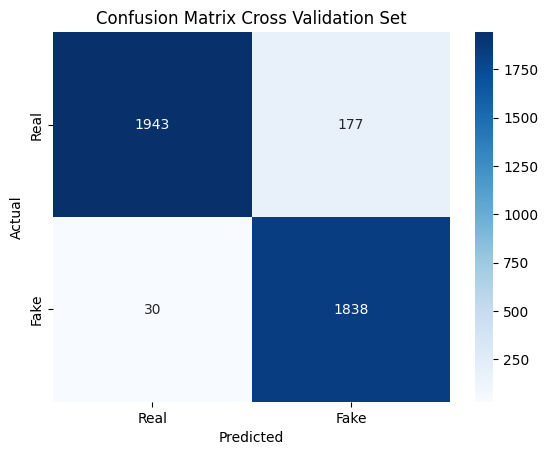

In [32]:
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Cross Validation Set')
plt.show()


In [33]:
y_pred = nb.predict(X_test_tfidf)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = 0)
recall = recall_score(y_test, y_pred, pos_label = 0)
f1 = f1_score(y_test, y_pred, pos_label = 0)
report = classification_report(y_test, y_pred)

In [35]:
accuracy

0.9498495486459378

In [36]:
precision

0.9754098360655737

In [37]:
recall

0.9260700389105059

In [38]:
f1

0.9500998003992016

In [39]:
report

'              precision    recall  f1-score   support\n\n           0       0.98      0.93      0.95       514\n           1       0.93      0.98      0.95       483\n\n    accuracy                           0.95       997\n   macro avg       0.95      0.95      0.95       997\nweighted avg       0.95      0.95      0.95       997\n'

In [40]:
cm = confusion_matrix(y_test, y_pred)

In [41]:
cm

array([[476,  38],
       [ 12, 471]], dtype=int64)

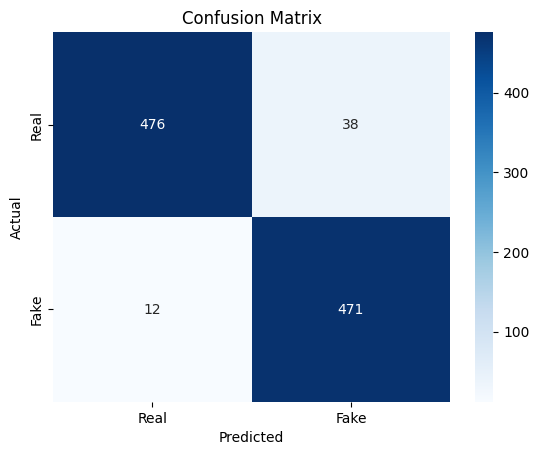

In [42]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
